Python contains a fairly extensive set of tools for working with dates, times, and time-indexed data. This notebook shows time series analysis graphs.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [35]:
bridge = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [36]:
bridge.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [37]:
bridge.columns = ['West', 'East']
bridge['Total'] = bridge.eval('West + East')

In [38]:
bridge.head()

,West,East,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0
2019-04-30 20:00:00,58.0,91.0,149.0
2019-04-30 19:00:00,106.0,175.0,281.0


In [39]:
bridge.dropna().describe()

,West,East,Total
count,57615.000000,57615.000000,57615.000000
mean,51.916914,58.359889,110.276803
std,67.368033,84.958511,139.743003
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


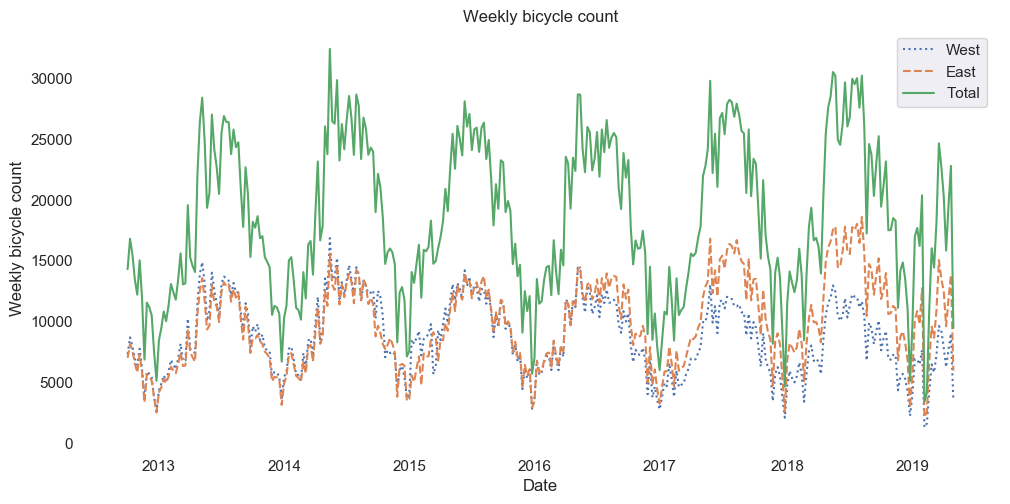

In [42]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax= fig.gca()
weekly = bridge.resample('W').sum()
weekly.plot(style=[':', '--', '-'],ax=ax)
ax.set_facecolor('xkcd:white')
plt.tight_layout()
ax.set_title('Weekly bicycle count');
plt.ylabel('Weekly bicycle count');

The figure above shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week

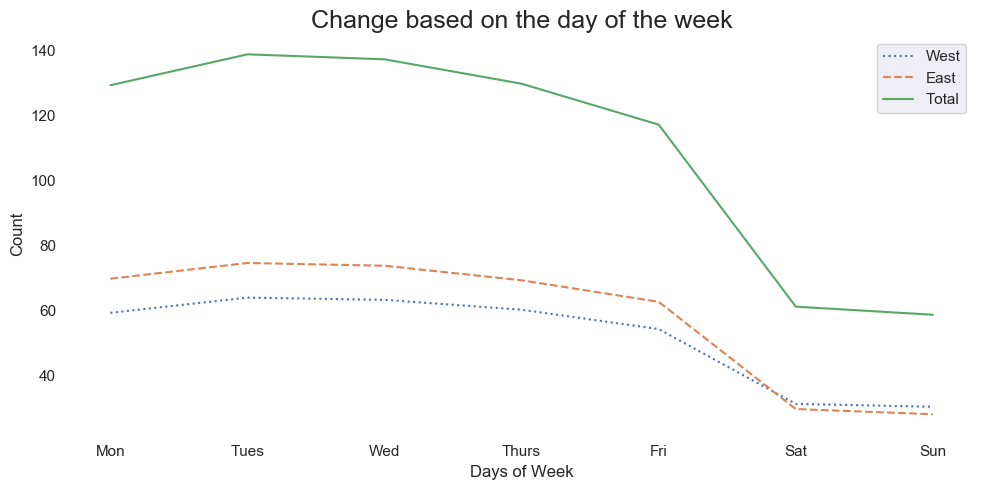

In [57]:
fig = plt.figure(figsize=(10,5),dpi=100)
ax= fig.gca()
by_weekday = bridge.groupby(bridge.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], ax=ax);
ax.set_facecolor('xkcd:white')
ax.set(xticks=np.arange(7),xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
ax.set_xlabel('Days of Week')
ax.set_ylabel('Count')
ax.set_title('Change based on the day of the week', size=18);
plt.tight_layout()

The figure above shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.